In [34]:
import pandas as pd 

In [35]:
df = pd.read_csv('/Users/victorolushola/Downloads/income.csv')

In [36]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [37]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [38]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [39]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [40]:
df= pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')],axis=1)
df= pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('work_class_')],axis=1)
df= df.drop('education', axis=1)
df= pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')],axis=1)
df= pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')],axis=1)
df= pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')],axis=1)
df= pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')],axis=1)

In [41]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [42]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [43]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [44]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'work_class_?', 'work_class_Federal-gov', 'work_class_Local-gov',
       'work_class_Never-worked', 'work_class_Private',
       'work_class_Self-emp-inc', 'work_class_Self-emp-not-inc',
       'work_class_State-gov', 'work_class_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
   

<Axes: >

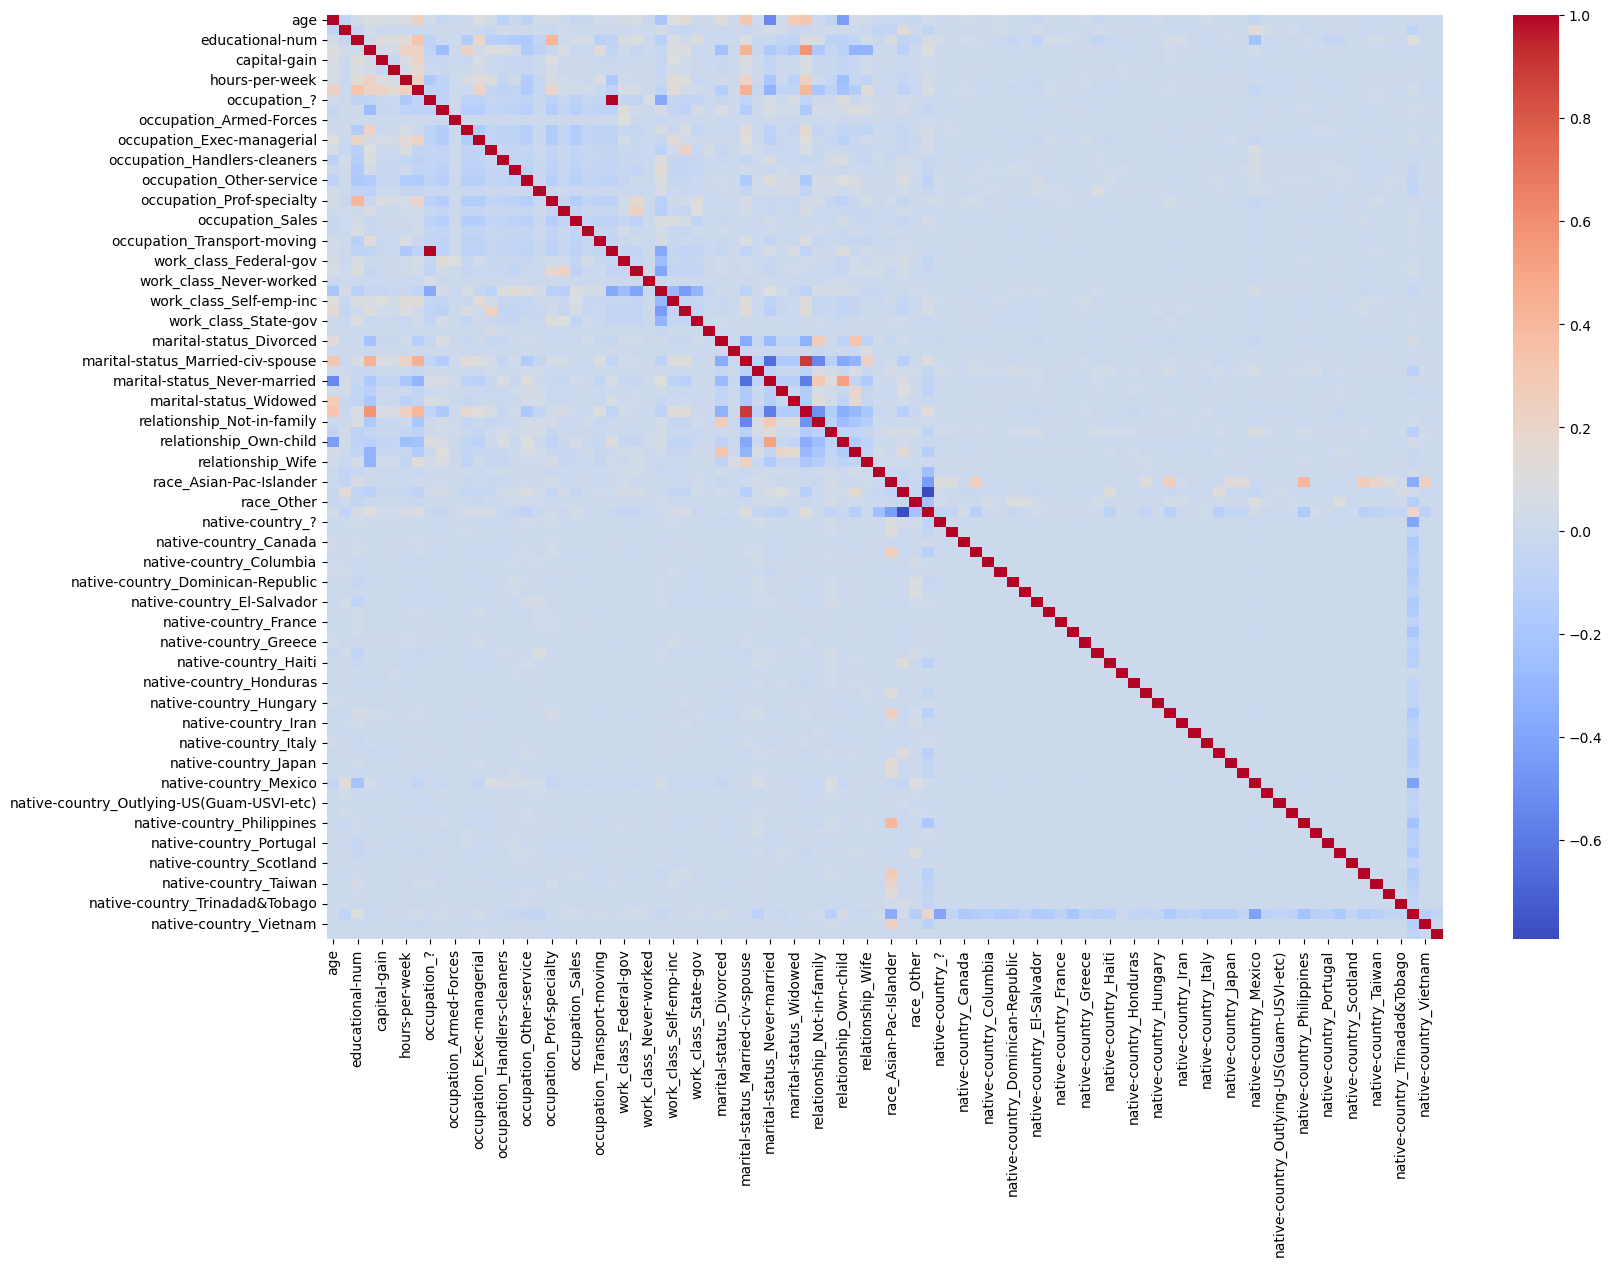

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [46]:
 df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [47]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len (df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [48]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,work_class_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

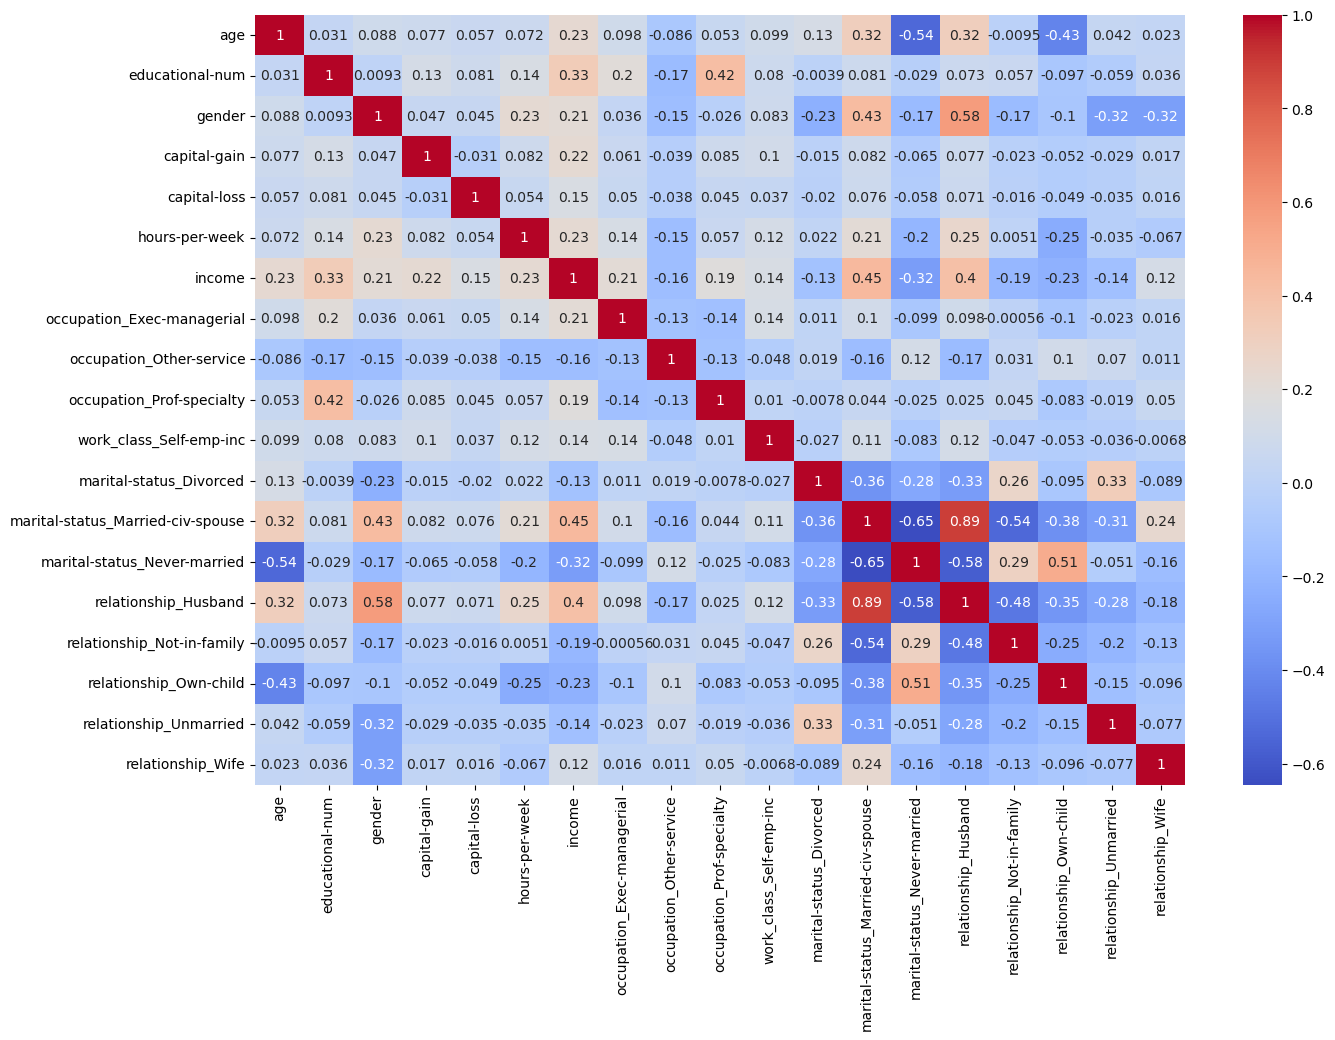

In [54]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df=df.drop('fnlwgt', axis=1)


train_df, test_df = train_test_split(df, test_size=0.2)

In [64]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
28310,52,4,1,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
29429,49,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40282,23,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32394,54,14,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6342,49,13,1,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19150,28,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15935,24,3,1,0,0,60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16454,27,13,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36918,37,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
26714,27,9,0,0,0,52,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1078,44,13,1,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13272,56,9,1,0,1977,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39514,61,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29822,59,4,1,0,0,32,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18237,68,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,9,1,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,59,9,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35571,21,9,0,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
train_X = train_df.drop('income',axis=1)
train_y = train_df['income']

test_X = test_df.drop('income',axis=1)
test_y = test_df['income']

In [67]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [68]:
forest.score(test_X, test_y)

0.8505476507319071

In [70]:
importances = dict(zip( forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [71]:
importances

{'age': 0.2318120717468282,
 'educational-num': 0.1275754798408199,
 'hours-per-week': 0.11482393824587628,
 'capital-gain': 0.1048205408968184,
 'marital-status_Married-civ-spouse': 0.06615761388743562,
 'relationship_Husband': 0.04732314890624579,
 'capital-loss': 0.03566743108217069,
 'marital-status_Never-married': 0.024963638290332945,
 'occupation_Exec-managerial': 0.022215638776678214,
 'occupation_Prof-specialty': 0.018424569258380475,
 'gender': 0.014150732989945392,
 'relationship_Not-in-family': 0.012939359757182833,
 'relationship_Own-child': 0.010787370013044086,
 'relationship_Wife': 0.010694470647397489,
 'work_class_Private': 0.009432999952739149,
 'marital-status_Divorced': 0.008448421625602089,
 'occupation_Other-service': 0.008341050729186983,
 'work_class_Self-emp-not-inc': 0.008285112111928556,
 'race_White': 0.006324955029126001,
 'occupation_Sales': 0.006270315585418452,
 'occupation_Craft-repair': 0.006211408865211595,
 'native-country_United-States': 0.00615015

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid=param_grid, verbose=10)

In [82]:
grid_search.fit(train_X,train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250
[CV 1/5; 1/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.861 total time=   7.9s
[CV 2/5; 1/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250
[CV 2/5; 1/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.863 total time=   7.3s
[CV 3/5; 1/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250
[CV 3/5; 1/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.861 total time=   6.8s
[CV 4/5; 1/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250
[CV 4/5; 1/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.861 total time=   6.8s
[CV 5/5; 1/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_e

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 50, 80, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [4, 6],
                         'n_estimators': [250, 300, 450]},
             verbose=10)

In [76]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=250)

In [83]:
forest.score(test_X,test_y)

0.8505476507319071

In [78]:
importances = dict(zip( forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [79]:
importances

{'age': 0.2318120717468282,
 'educational-num': 0.1275754798408199,
 'hours-per-week': 0.11482393824587628,
 'capital-gain': 0.1048205408968184,
 'marital-status_Married-civ-spouse': 0.06615761388743562,
 'relationship_Husband': 0.04732314890624579,
 'capital-loss': 0.03566743108217069,
 'marital-status_Never-married': 0.024963638290332945,
 'occupation_Exec-managerial': 0.022215638776678214,
 'occupation_Prof-specialty': 0.018424569258380475,
 'gender': 0.014150732989945392,
 'relationship_Not-in-family': 0.012939359757182833,
 'relationship_Own-child': 0.010787370013044086,
 'relationship_Wife': 0.010694470647397489,
 'work_class_Private': 0.009432999952739149,
 'marital-status_Divorced': 0.008448421625602089,
 'occupation_Other-service': 0.008341050729186983,
 'work_class_Self-emp-not-inc': 0.008285112111928556,
 'race_White': 0.006324955029126001,
 'occupation_Sales': 0.006270315585418452,
 'occupation_Craft-repair': 0.006211408865211595,
 'native-country_United-States': 0.00615015